In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [87]:
short_window = 30
long_window = 365
delta = 0.02  
capital_per_trade = 0.15 

df = pd.read_csv('SPY (2003-01 - 2021-11).csv')
df = df[['Date','Adj Close']]

df['short_ma'] = df['Adj Close'].rolling(window=short_window).mean()
df['long_ma'] = df['Adj Close'].rolling(window=long_window).mean()
df['pct_change'] = df['Adj Close'].pct_change() # pct_change10 is the pct change from adjClose9 to adjClose10

df['position'] = 0  # 1 = long, -1 = short, 0 = no position

# Poulating positions
for i in range(long_window-1, len(df)): # if long_window=30, the first long_ma is at index 29, the first position exist trading hours at index 30
    # assume i = 29

    if df.loc[i, 'position'] == 0: # i = 29
        if df.loc[i, 'short_ma'] > df.loc[i, 'long_ma']: # if shortMA29 > longMA29
            df.loc[i+1, 'position'] = 1 # position30=1, so that df['daily_pnl'] =  df['position']* df['pct_change']  
        
        elif df.loc[i, 'short_ma'] < df.loc[i, 'long_ma']:
            df.loc[i+1, 'position'] = -1
    
    elif df.loc[i, 'position'] == 1: # if i=29 is 1
        if df.loc[i, 'pct_change'] < -delta:
            df.loc[i+1, 'position'] = 0 # then position30=0

        elif df.loc[i, 'short_ma'] < df.loc[i, 'long_ma']:
            df.loc[i+1, 'position'] = 0 # then position30=0
            
        else:
            df.loc[i+1, 'position'] = 1
    
    elif df.loc[i, 'position'] == -1: # if i =29 is -1
    
        # if (adjClose29 > adjClose28 * 0.98) or (or shortMA29 > longMA30)
        if df.loc[i, 'pct_change'] > delta or \
           df.loc[i, 'short_ma'] > df.loc[i, 'long_ma']:
            df.loc[i, 'position'] = 0 # position30 = 0
            
        else:
            df.loc[i+1, 'position'] = -1
            
df['daily_pnl'] =  df['position']* df['pct_change']  
df['cum_pnl'] = (1 + df['daily_pnl']*capital_per_trade).cumprod() - 1

- daily_pnl = percentage change of capital on a daily basis
- cum_pnl = percentage change of capital on a cumulative basis

In [88]:
df[360:600].head(10)

,Date,Adj Close,short_ma,long_ma,pct_change,position,daily_pnl,cum_pnl
360,2004-06-08,81.390900,79.027457,NaN,0.001395,0.0,0.000000,0.000000
361,2004-06-09,80.632698,79.015411,NaN,-0.009316,0.0,-0.000000,0.000000
362,2004-06-10,81.029526,79.051550,NaN,0.004921,0.0,0.000000,0.000000
363,2004-06-14,80.228798,79.084383,NaN,-0.009882,0.0,-0.000000,0.000000
364,2004-06-15,80.795670,79.156661,71.596239,0.007066,0.0,0.000000,0.000000
365,2004-06-16,80.781494,79.200358,71.644200,-0.000175,1.0,-0.000175,-0.000026
366,2004-06-17,80.661049,79.242166,71.691297,-0.001491,1.0,-0.001491,-0.000250
367,2004-06-18,80.813217,79.272040,71.735747,0.001887,1.0,0.001887,0.000033
368,2004-06-21,80.507408,79.314632,71.779797,-0.003784,1.0,-0.003784,-0.000535
369,2004-06-22,80.912819,79.414436,71.827509,0.005036,1.0,0.005036,0.000220


In [89]:
df_to_save = df[['Date', 'daily_pnl']].copy()
df_to_save['daily_pnl'] = round(df[['daily_pnl']]*100)
df_to_save.columns = ['Date', 'Strategy Daily Pnl (%)']
df_to_save['Date'] = pd.to_datetime(df_to_save['Date']).dt.strftime('%Y-%m-%d')
df_to_save.to_csv('Daily_Pnlz.csv', index=False)

In [90]:
df.set_index('Date', inplace=True)
df

,Adj Close,short_ma,long_ma,pct_change,position,daily_pnl,cum_pnl
Date,,,,,,,
2003-01-02,63.275799,NaN,NaN,NaN,0.0,NaN,NaN
2003-01-03,63.470383,NaN,NaN,0.003075,0.0,0.000000,0.000000
2003-01-06,64.589005,NaN,NaN,0.017624,0.0,0.000000,0.000000
2003-01-07,64.429184,NaN,NaN,-0.002474,0.0,-0.000000,0.000000
2003-01-08,63.498142,NaN,NaN,-0.014451,0.0,-0.000000,0.000000
...,...,...,...,...,...,...,...
2021-11-18,469.730011,456.577999,386.125855,0.003396,1.0,0.003396,0.598435
2021-11-19,468.890015,457.612333,386.605118,-0.001788,1.0,-0.001788,0.598006
2021-11-22,467.570007,458.708333,387.071121,-0.002815,1.0,-0.002815,0.597331


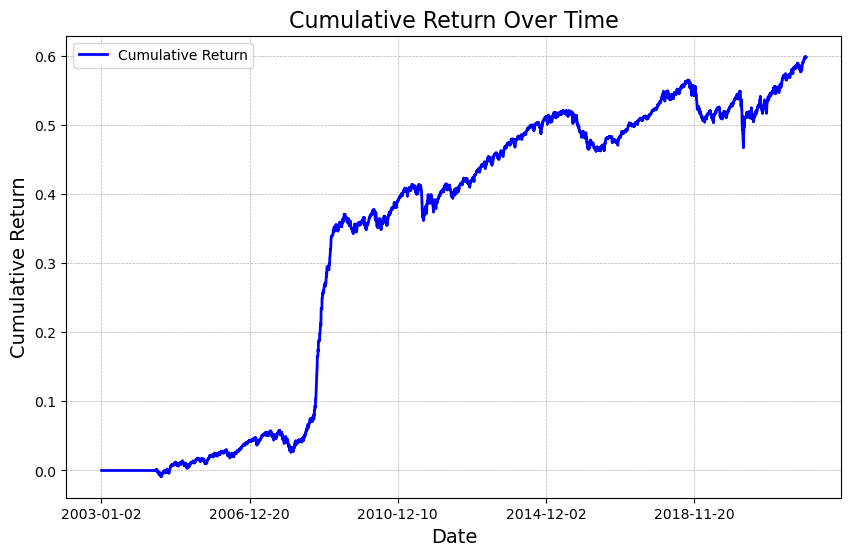

In [91]:
plt.figure(figsize=(10, 6))
df['cum_pnl'].plot(color='blue', linestyle='-', linewidth=2)

plt.title('Cumulative Return Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['Cumulative Return'], loc='upper left')
plt.show()

In [92]:
df = df.dropna()

In [93]:
df

,Adj Close,short_ma,long_ma,pct_change,position,daily_pnl,cum_pnl
Date,,,,,,,
2004-06-15,80.795670,79.156661,71.596239,0.007066,0.0,0.000000,0.000000
2004-06-16,80.781494,79.200358,71.644200,-0.000175,1.0,-0.000175,-0.000026
2004-06-17,80.661049,79.242166,71.691297,-0.001491,1.0,-0.001491,-0.000250
2004-06-18,80.813217,79.272040,71.735747,0.001887,1.0,0.001887,0.000033
2004-06-21,80.507408,79.314632,71.779797,-0.003784,1.0,-0.003784,-0.000535
...,...,...,...,...,...,...,...
2021-11-17,468.140015,455.542332,385.693559,-0.002429,1.0,-0.002429,0.597621
2021-11-18,469.730011,456.577999,386.125855,0.003396,1.0,0.003396,0.598435
2021-11-19,468.890015,457.612333,386.605118,-0.001788,1.0,-0.001788,0.598006


In [97]:
print(f"Net Profit = {df['cum_pnl'][-1]*100:.2f}%") 

Net Profit = 59.76%


In [100]:
cagr = round(((1+df['cum_pnl'][-1]) ** (252.0 / len(df)) - 1)*100)
print(f'CAGR = {cagr}%')

CAGR = 3%


In [108]:
mean = round(df['daily_pnl'].mean()*252,5)
std = round(df['daily_pnl'].std()* (252**0.5),5)
print(f'Mean of Daily Pnl = ${mean}')
print(f'Standard Deviation of Daily Pnl = {std}')

Mean of Daily Pnl = $0.18112
Standard Deviation of Daily Pnl = 0.16208


In [105]:
non_zero_counts = df['position'].diff().astype(bool).sum(axis=0)
print("Total number of trades = ", non_zero_counts)

Total number of trades =  318


In [106]:
win_rate = round((df['daily_pnl'] > 0).sum() / df['daily_pnl'].count() * 100) # np.nan in "trade_pnl" col is ignored 
print(f'Win rate = {win_rate}%')

Win rate = 52%


In [111]:
##### Profitability Ratio (Payoff Ratio)
average_positive_pnl = round(df['daily_pnl'][df['daily_pnl'] > 0].mean(),5)
average_negative_pnl = round(df['daily_pnl'][df['daily_pnl'] < 0].mean(),5)
payoff_ratio = round(average_positive_pnl / abs(average_negative_pnl),5)
print(f'Average Positive Pnl($) = ', average_positive_pnl)
print(f'Average Negative Pnl($) = ', average_negative_pnl)
print(f'Payout Ratio = ', payoff_ratio)

Average Positive Pnl($) =  0.00693
Average Negative Pnl($) =  -0.00678
Payout Ratio =  1.02212
